In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

<img src = './ggplot2_onevariable.png'/>

# Dot plot

In a dot plot, the width of a dot corresponds to the bin width (or maximum width, depending on the binning algorithm), and dots are stacked, with each dot representing one observation.

```R
geom_dotplot(
  mapping = NULL,
  data = NULL,
  position = "identity",
  ...,
  binwidth = NULL,
  binaxis = "x",
  method = "dotdensity",
  binpositions = "bygroup",
  stackdir = "up",
  stackratio = 1,
  dotsize = 1,
  stackgroups = FALSE,
  origin = NULL,
  right = TRUE,
  width = 0.9,
  drop = FALSE,
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)
```

**Arguments**  
`binwidth`	
When method is "dotdensity", this specifies maximum bin width. When method is "histodot", this specifies bin width. Defaults to 1/30 of the range of the data

`binaxis`	
The axis to bin along, "x" (default) or "y"

`method`	
"dotdensity" (default) for dot-density binning, or "histodot" for fixed bin widths (like stat_bin)

`binpositions`	
When method is "dotdensity", "bygroup" (default) determines positions of the bins for each group separately. "all" determines positions of the bins with all the data taken together; this is used for aligning dot stacks across multiple groups.

`stackdir`	
which direction to stack the dots. "up" (default), "down", "center", "centerwhole" (centered, but with dots aligned)

`stackratio`	
how close to stack the dots. Default is 1, where dots just touch. Use smaller values for closer, overlapping dots.

`dotsize`	
The diameter of the dots relative to binwidth, default 1.

`stackgroups`	
should dots be stacked across groups? This has the effect that position = "stack" should have, but can't (because this geom has some odd properties).

`origin`	
When method is "histodot", origin of first bin

`right`	
When method is "histodot", should intervals be closed on the right (a, b], or not [a, b)

`width`	
When binaxis is "y", the spacing of the dot stacks for dodging.

`drop`	
If TRUE, remove all bins with zero counts

**Details**
There are two basic approaches: `dot-density` and `histodot`. With dot-density binning, the bin positions are determined by the data and binwidth, which is the maximum width of each bin. See Wilkinson (1999) for details on the dot-density binning algorithm. With histodot binning, the bins have fixed positions and fixed widths, much like a histogram.

When binning along the x axis and stacking along the y axis, the numbers on y axis are not meaningful, due to technical limitations of ggplot2. You can hide the y axis, as in one of the examples, or manually scale it to match the number of dots.

### Aesthetics

**geom_dotplot()** understands the following aesthetics (required aesthetics are in bold):

* **x**

* **y**

* alpha

* colour

* fill

* group

* linetype

* stroke

In [5]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


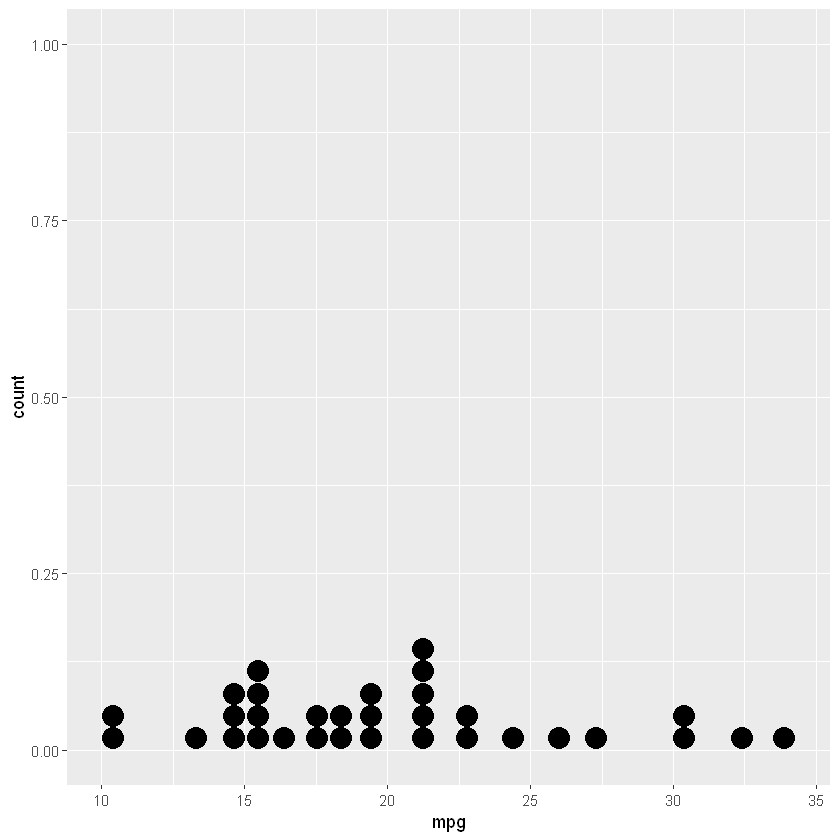

In [7]:
ggplot(mtcars, aes(mpg)) +
geom_dotplot()

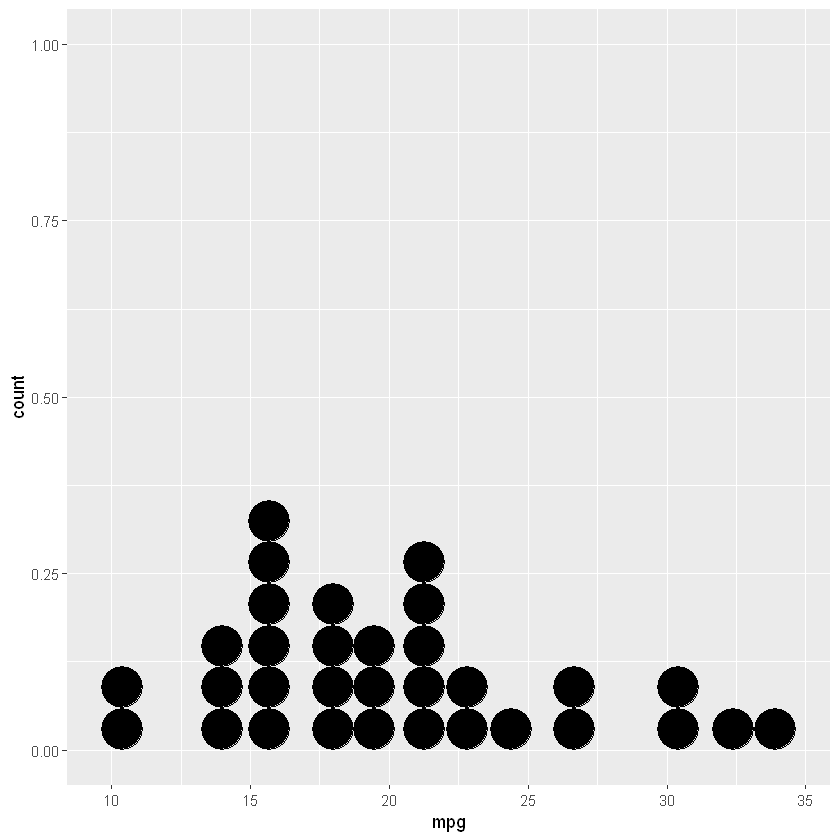

In [8]:
#set binwidth = 1.5
ggplot(mtcars, aes(mpg)) +
geom_dotplot(binwidth = 1.5)

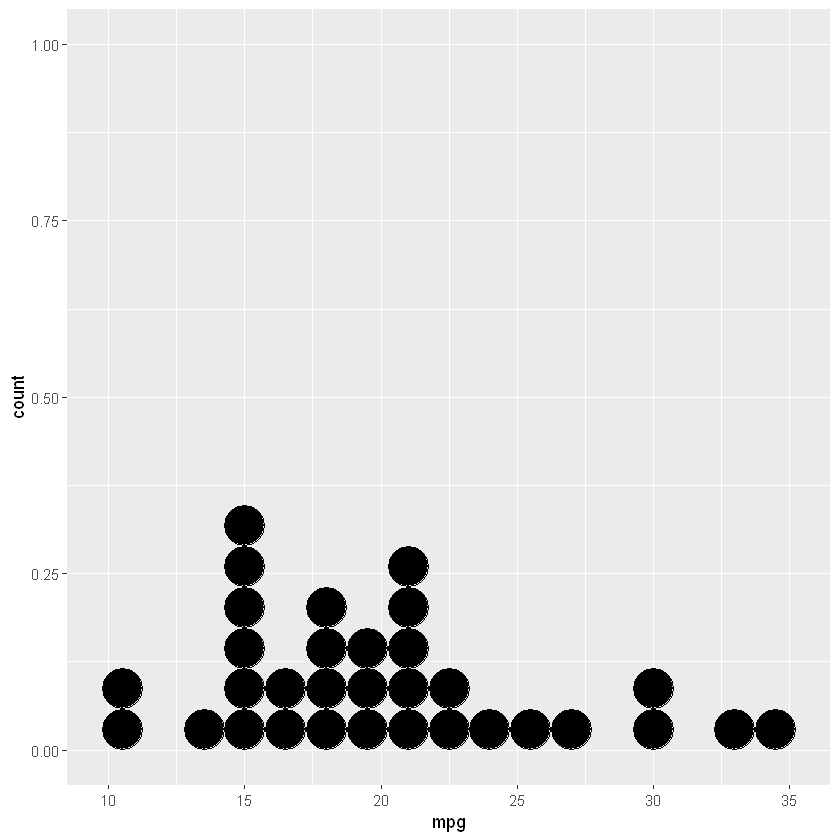

In [9]:
# Use fixed-width bins
ggplot(mtcars, aes(x = mpg)) +
  geom_dotplot(method="histodot", binwidth = 1.5)

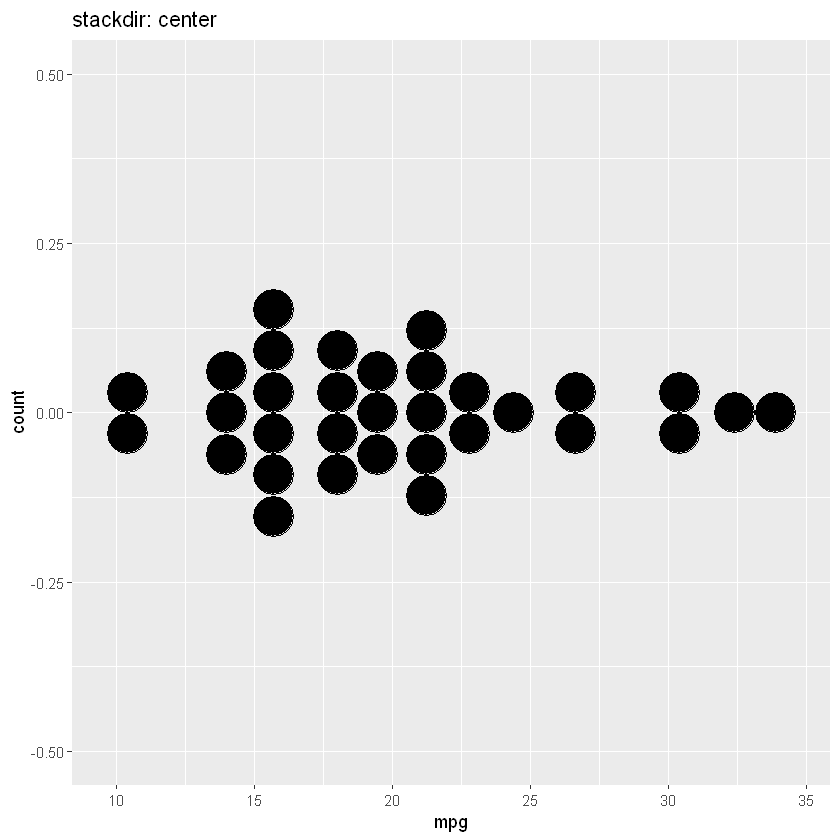

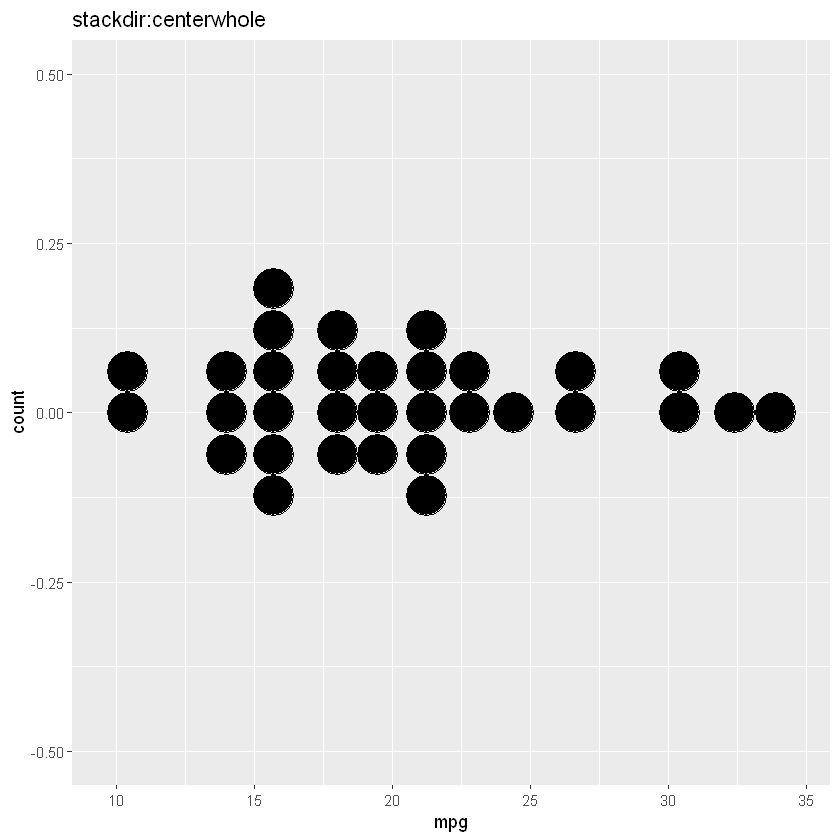

In [11]:
# Some other stacking methods
ggplot(mtcars, aes(x = mpg)) +
geom_dotplot(binwidth = 1.5, stackdir = "center") +
labs(title = 'stackdir: center')

ggplot(mtcars, aes(x = mpg)) +
geom_dotplot(binwidth = 1.5, stackdir = "centerwhole") +
labs(title = 'stackdir:centerwhole')

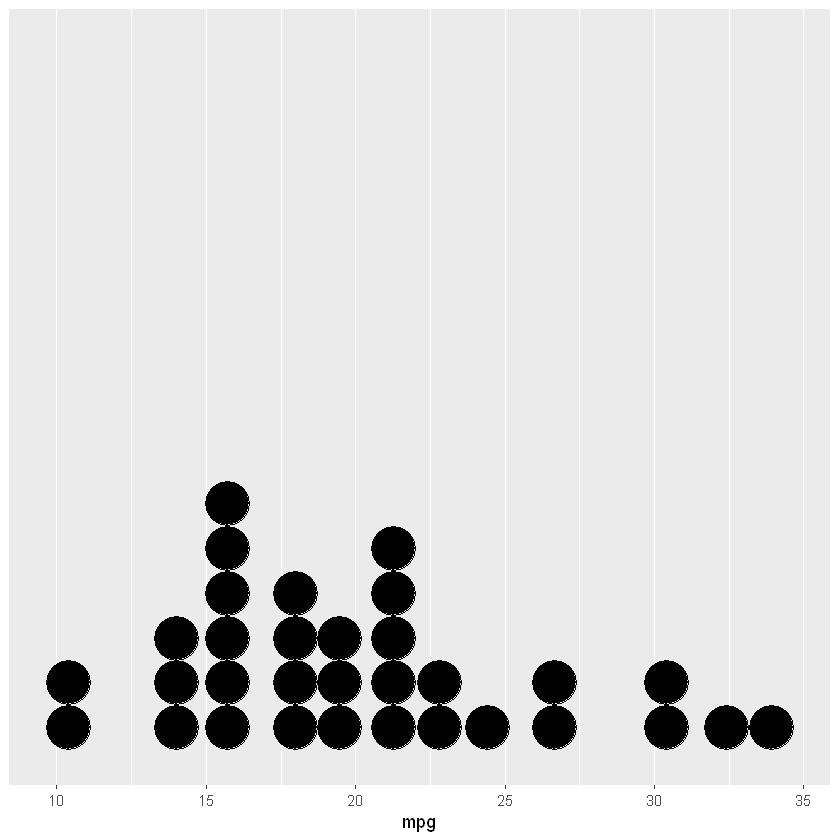

In [12]:
# y axis isn't really meaningful, so hide it
ggplot(mtcars, aes(x = mpg)) + 
geom_dotplot(binwidth = 1.5) +
scale_y_continuous(NULL, breaks = NULL)


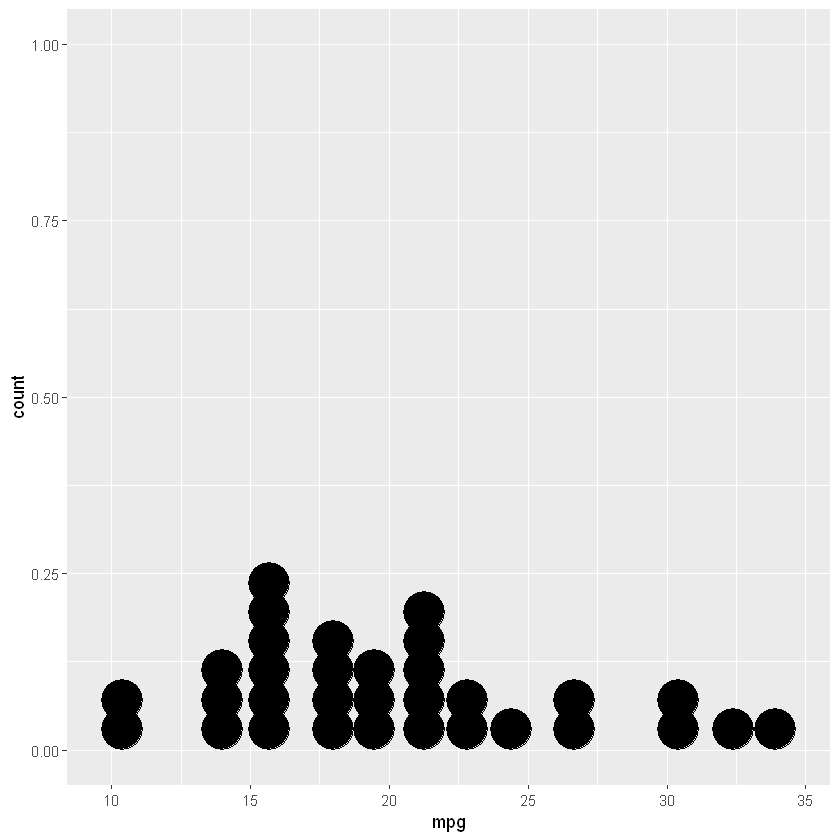

In [16]:
# Overlap dots vertically
ggplot(mtcars, aes(x = mpg)) + geom_dotplot(binwidth = 1.5, stackratio = .7)

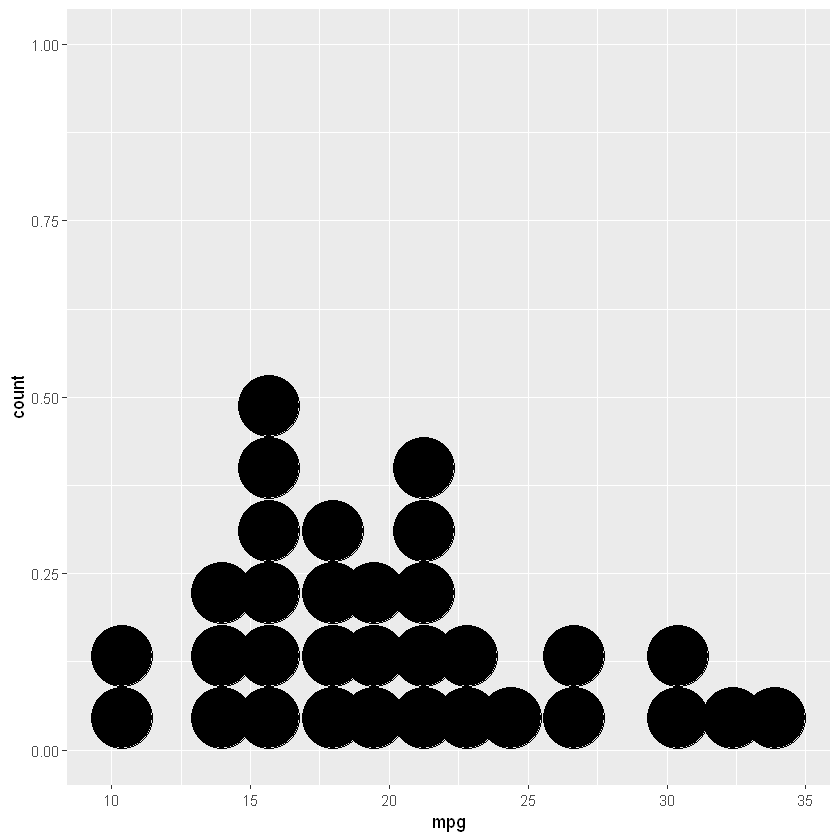

In [19]:
# Expand dot diameter
ggplot(mtcars, aes(x = mpg)) + geom_dotplot(binwidth = 1.5, dotsize = 1.5)

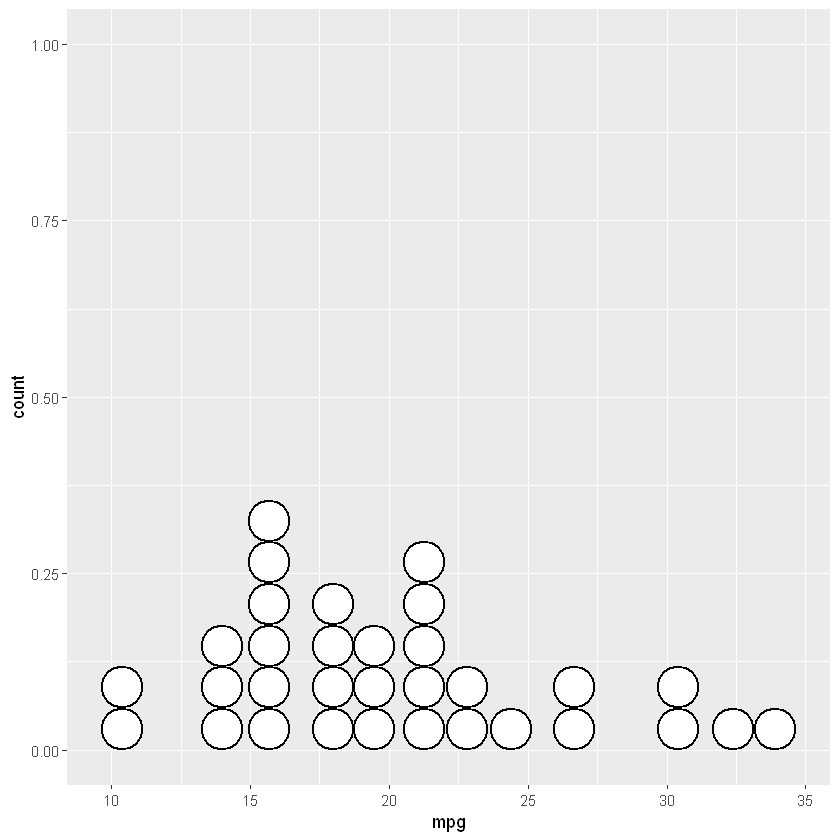

In [20]:
# Change dot fill colour, stroke width
ggplot(mtcars, aes(x = mpg)) + geom_dotplot(binwidth = 1.5, fill = "white", stroke = 2)

Examples with stacking along y axis instead of x

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


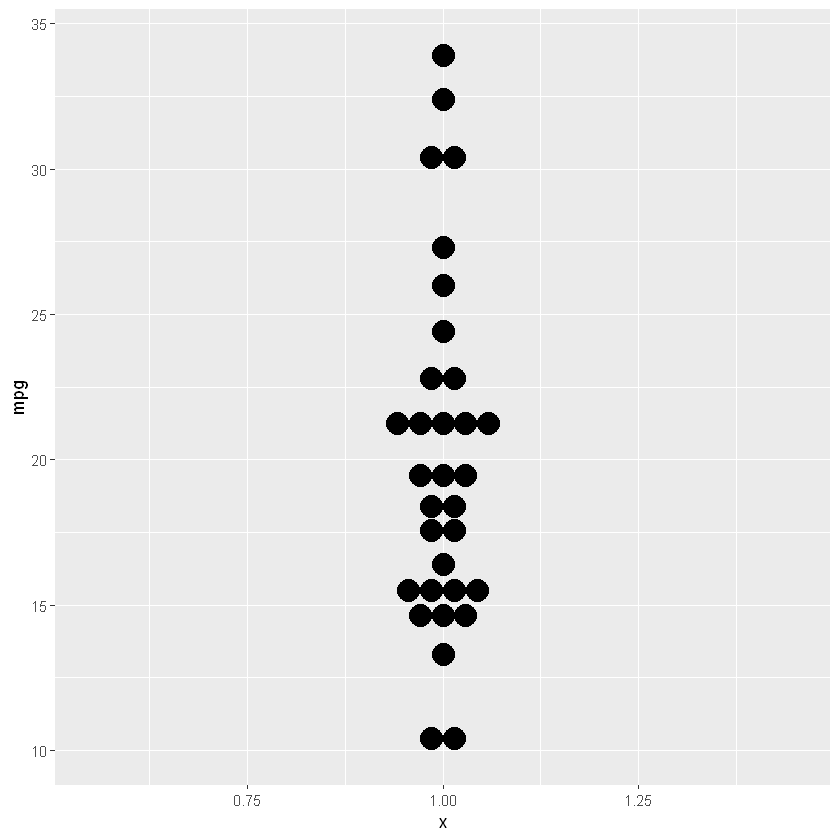

In [23]:
ggplot(mtcars, aes(x = 1, y = mpg)) +
  geom_dotplot(binaxis = "y", stackdir = "center")

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


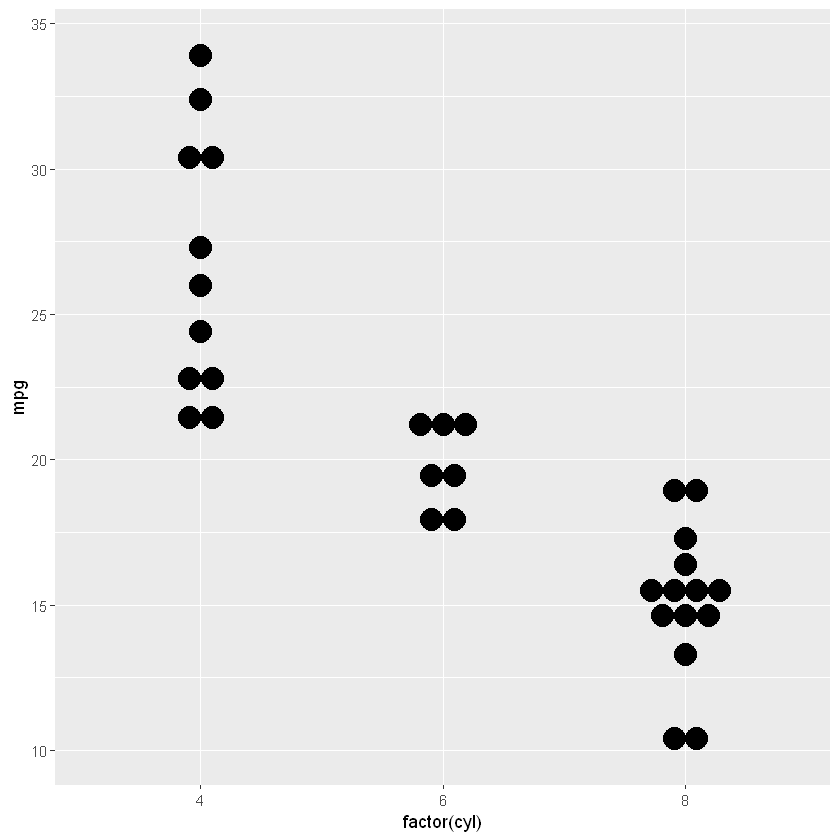

In [24]:
ggplot(mtcars, aes(x = factor(cyl), y = mpg)) +
  geom_dotplot(binaxis = "y", stackdir = "center")

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


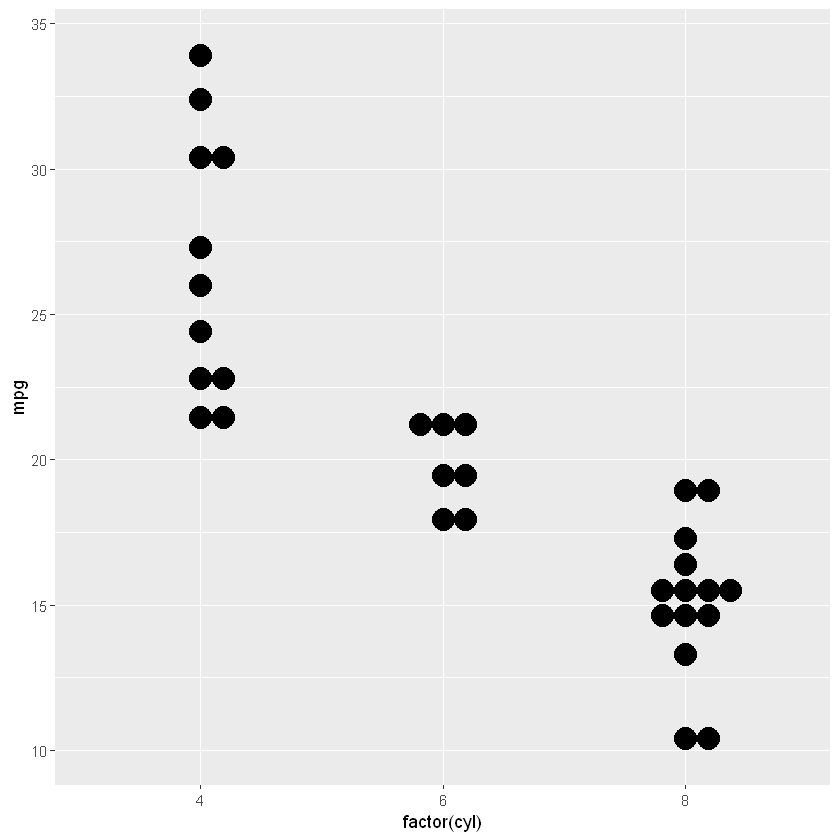

In [25]:
ggplot(mtcars, aes(x = factor(cyl), y = mpg)) +
  geom_dotplot(binaxis = "y", stackdir = "centerwhole")

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


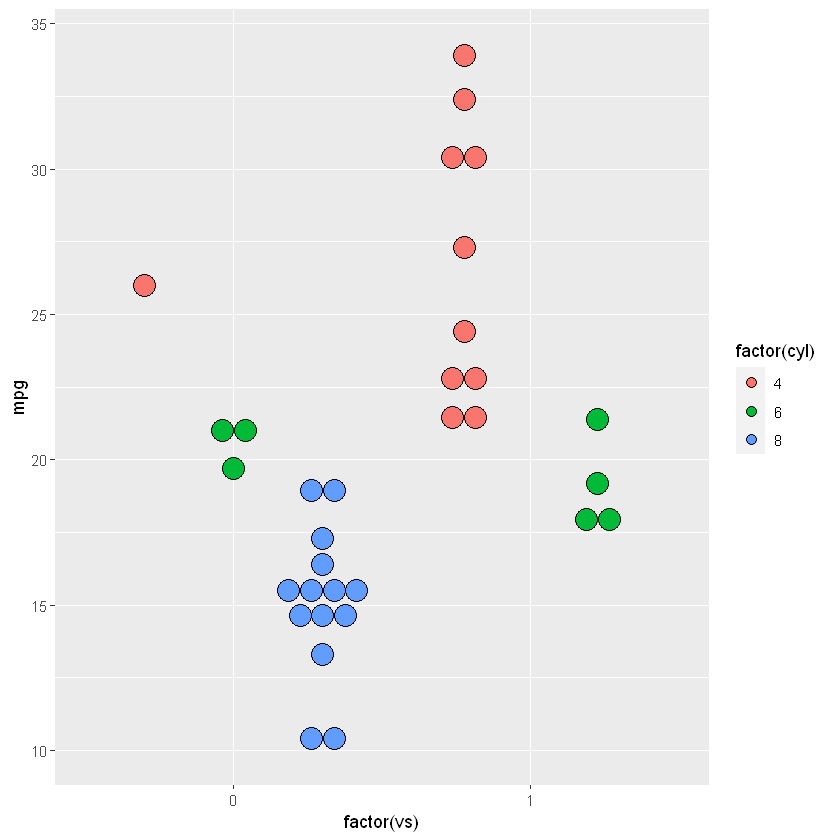

In [26]:
ggplot(mtcars, aes(x = factor(vs), fill = factor(cyl), y = mpg)) +
  geom_dotplot(binaxis = "y", stackdir = "center", position = "dodge")